## Deep Learning RNN

### Recurrent Neural Networks
* perform extremely well on temporal data
* Several variants including LSTMs, GRUs and Bidirectional RNNs

#### Why sequence models
* Sequence models like RNN and LSTMs have been applied to learning on sequences. All of these problems  with different input and output can be addressed as supervised learning with label data X, Y as the training set. For example
  + speech recognition (sequence to sequence)
    + X: wave sequence
    + Y: text sequence
  + Music generation (one to sequence)
    + X: nothing or an integer
    + Y: wave sequence
  + Sentiment classification (sequence to one)
    + X: text sequence
    + Y: integer rating from one to five
  + DNA sequence analysis (sequence to sequence)
    + X: DNA sequence
    + Y: DNA labels
  + Machine translation (sequence to sequence)
    + X: text sequence (in one language)
    + Y: text sequence (in other language)
  + Video activity recognition (sequence to one)
    + X: video frames
    + Y: label (activity)
  + Name entity recognition (sequence to sequence)
    + X: text sequence
    + Y: label sequence
    + can be used by search engines to index different types of words inside a text

#### Representing words
* gether the words to be included in a vocabulary list. To to this, you can read all the texts you have and get m words with the most occurrence, or serach online for m most occurrent words. Each word has an index
* based on the index, each word is encoded in a one-hot vector where the element at index position has the value of 1 and all other elements in the vector are zeros
* add a token to the vocabulary list representing unknow text and use its index when we find a word not in the dictionary
* the goal is to establish a mapping between these word representations to target output using a sequence model

#### Recurrent Neural Network Model
* standard network has two problems for sequence tasks
  + input and output can have different lengths in different examples
    + we can pad inputs and outputs to the max lengths, but it is not a good solution
  + doesn't share features learned across different postions of text/sequence
    + using a feature sharing like in CNNs can significantly reduce the number of parameters in model
* RNN doesn't have either of the two mentioned problems
* Architecture of RNN
  + the following chart describes a RNN for name entity recognition task. 
    + The input and output has the same length
    + a<0> is usually initialized with zeros, but some others may initialize it randomly in some cases
    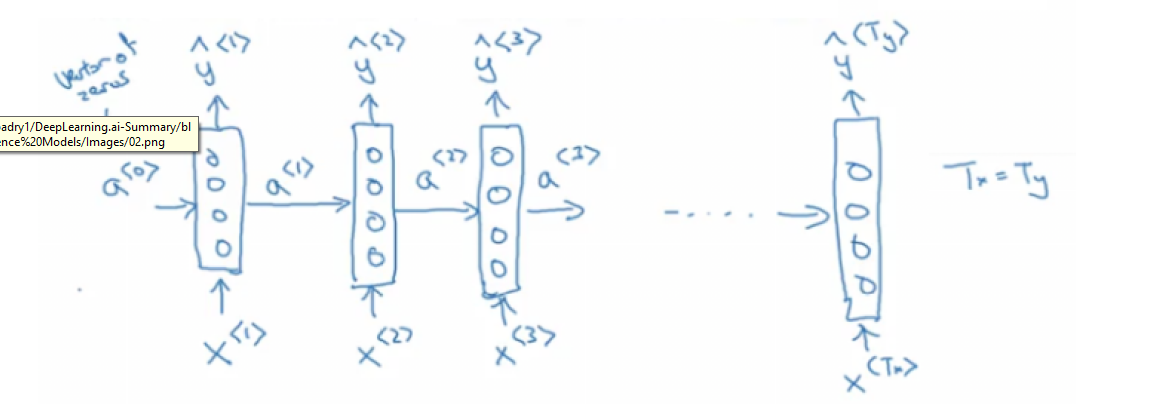
    + there are three weight matrices Wax, Waa, and Wya with shapes
      + Wax: (number of hidden neurons, nx) where nx is the length of input vector
      + Waa: number of hidden neurons, number of hidden neurons
        + memory the RNN is trying to maintain from the previous layers
        + convert the input of a at t-1 to a at t, so it is a square matrix
      + Way: (ny, number of hidden neurons) where ny is the length of output vector
  + from the chart, the current output of the ith y depends on the previous inputs and activations
    + the limitation of this architecture is that it can't learn from elements later in the sequence, which can be solved better by Bidirectional RNN (BRNN)
  + the input/output transformation in name entity recognition task
    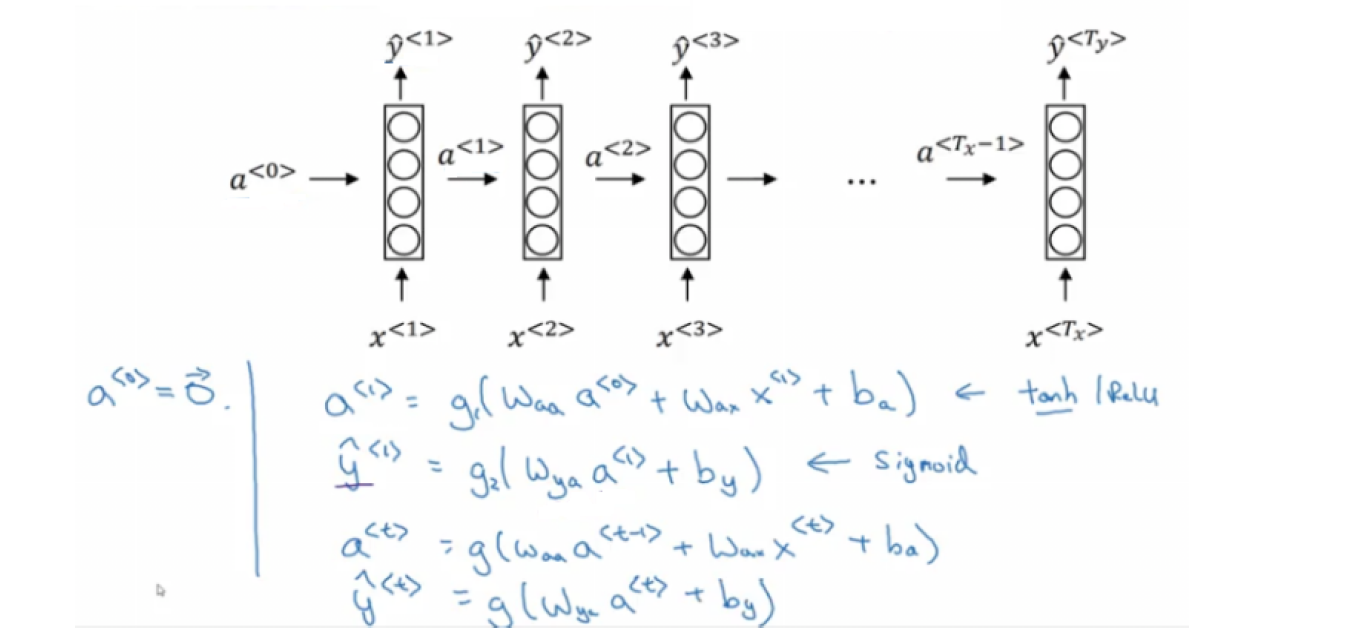
  + the forward propagation and backprogation are shown in the following picture
  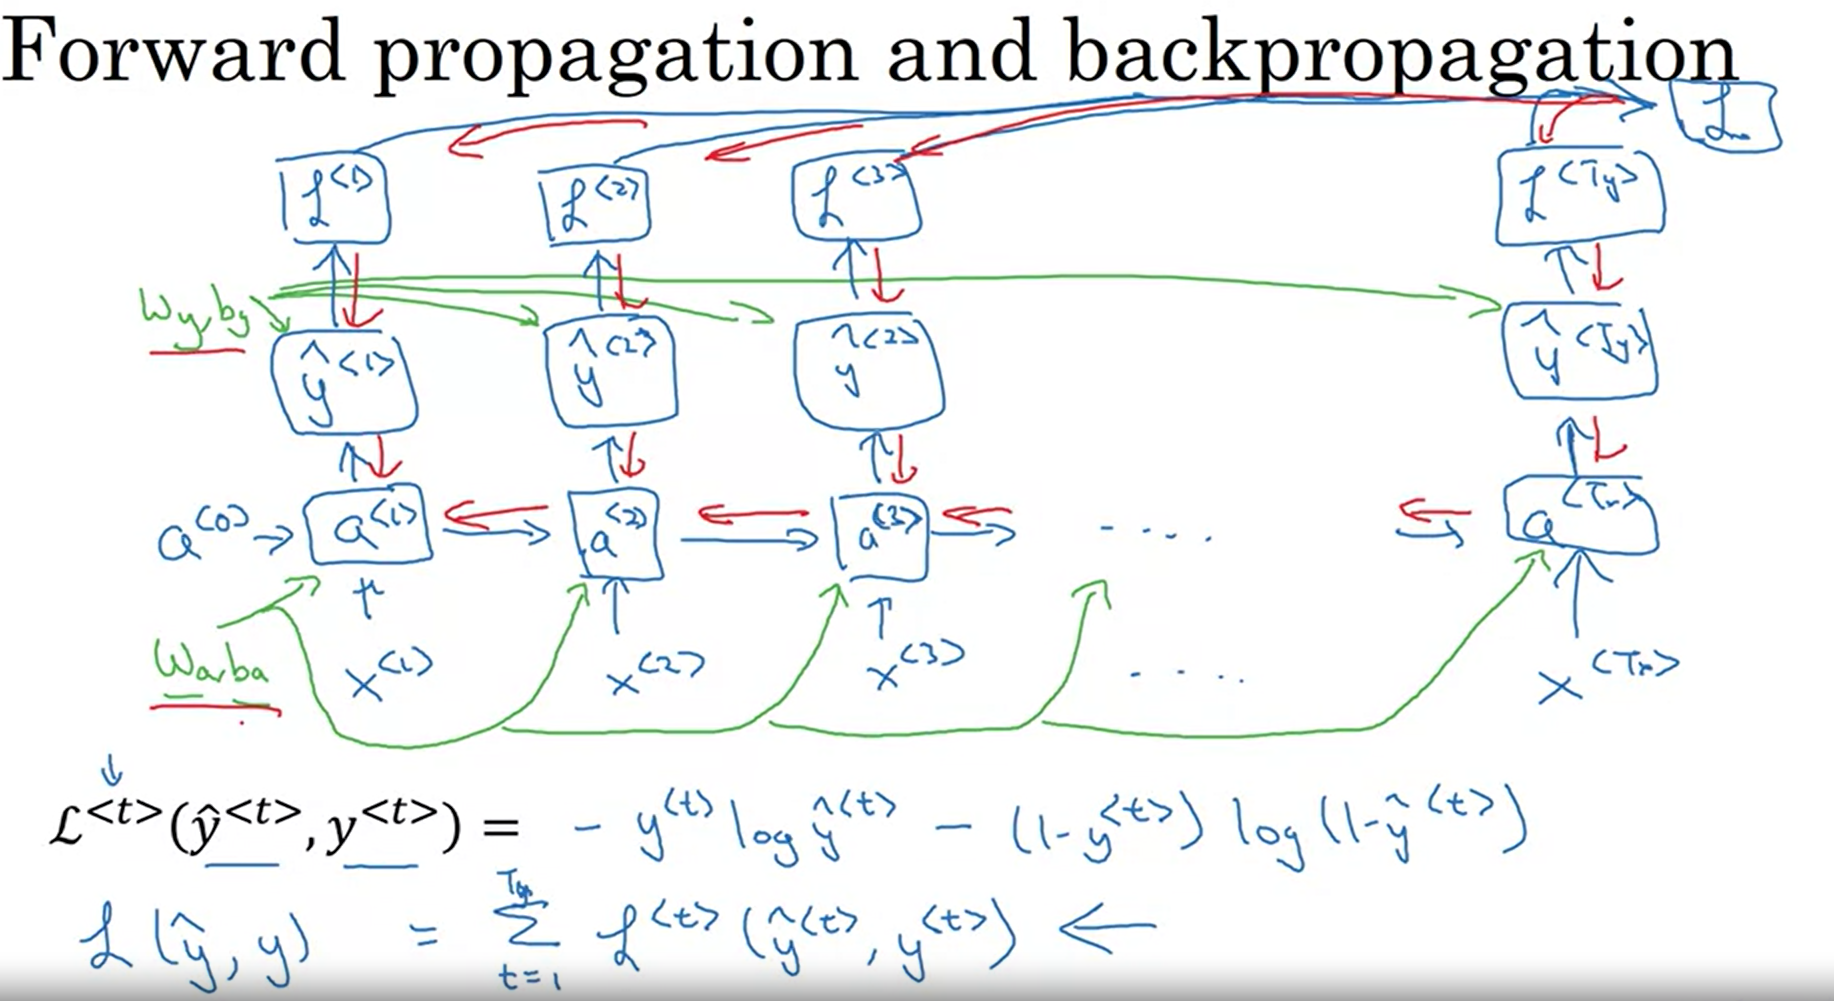
    + The architecture showed here are similar to a two layer NN where Wa, ba, Wy and by are shared among all the t of input x, a and y. The cost funtion is the sum of each cost of y, and y hat
    + the difference between CNN is the backgropagations are from both right to left and up to bottom directions

#### Different types of RNNs
* the following chart shows the different RNN types and architectures
  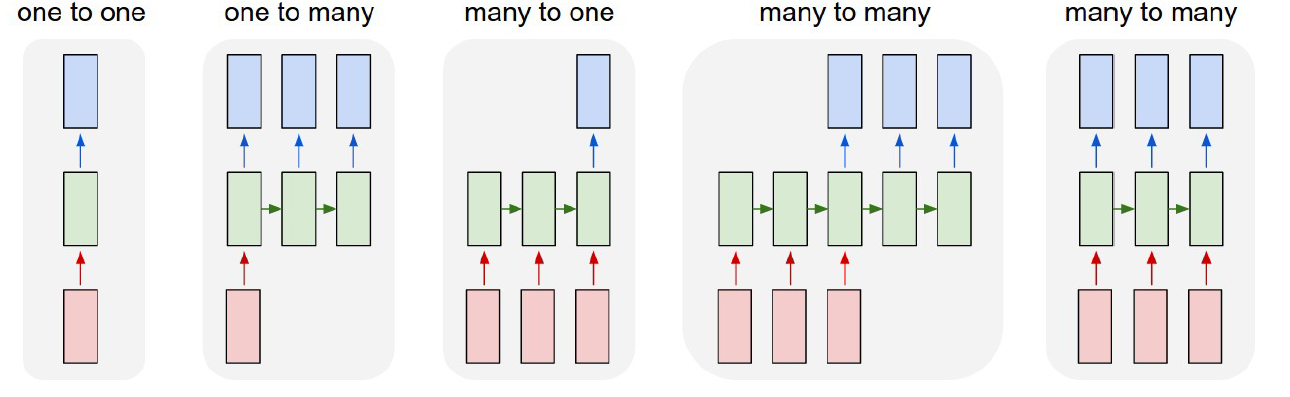
  + the third architectrue represents a encoder-decoder architecture where input and output have different length. In addition, encoder and decoder have different matrices

### Language model and sequence generation
#### Language modle
* the job of a language model is to give a probability of any given sequence of words
* How to build language models with RNN?
  + get a training set containing a large corpus of target language text
  + tokenize this training set by getting the vocabulary and then one-hot each word
  + put an end of sentence token EOS with the vocabulary and include it with each converted sentence. Also, use the token UNK for the unknown words
  + feed each word to the RNN model. In each y hat, predict the probability of each word in the dictionary using a softmax function, given the previous words as the prefix, what is the probability of the next word. As show in the picture below
  + In the following picture, we use RNN model to predict the input sentence "Cat average 15 hours of sleep a day. EOS"
  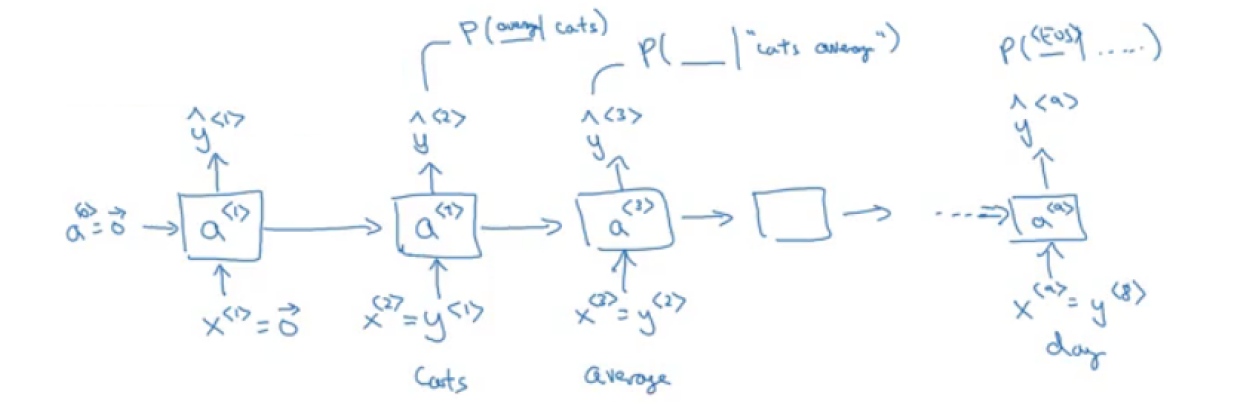
  + to use the model, we feed the sentence to RNN and then get the predicted y hat hot vector, and sort it by maximum probability
  + to cacluate the probability of a sentence, we compute the product of the probabilities
  + the loss function is defined by cross-entropy loss as in softmax, as shown below
  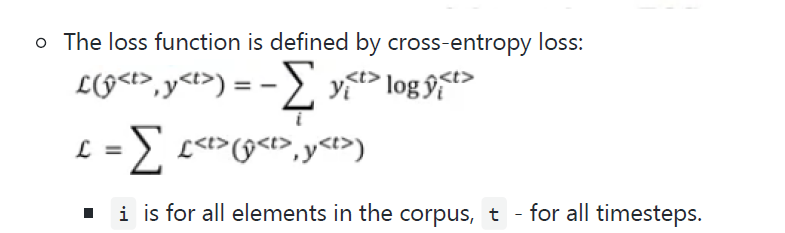
  + after the language model is trained, you can apply it to generate sentences by feeding empty vectors where all elements of the vetors are zeros.This can be models at either word level or character level 

### RNNs for long sequences

#### Vanishing gradients with RNNs
* one of the problems with naive RNNs is the vanishing gradient problem, especially when processing a sequence data with many time steps, which has very deep layers, and is very hard to optimize.
  + this is because in the backprogation, it has to go a long way to pass the errors to earlier layer and the gradient will become very small for gradient descent algorith to optimzie the weights (vanishing gradient problem)
  + for example, to compute the word "was", we need to compute the gradient for everything behind. Multiplying fractions tends to vanish the gradient, while multiplication of large number tends to explode it. As a result, some of the weights may not be updated correctly
  + As a result, RNNs aren't good in long-term dependencies
* Vanishing gradients problem tends to be the bigger problem with RNNs than the exploding gradients
* exploding gradients can be easily seen when weight values become NaN. We can apply gradient clipping to rescale some gradient vector so that it is not too big, by clipping them to some maximum value
* 

#### GRU (Gated Recurrent Unit)
* GRU is an RNN type that can help solve the vanishing gradient problem and can remember the long-term dependencies
* As shown in the below picture, a and x at time t are combined as input vector, which is transformed by tanh function, the output is a(t+1) to the next RNN unit. At the same time, the same output is fed to a softmax function to predict the probabilities of the words in dictionary as y(t)
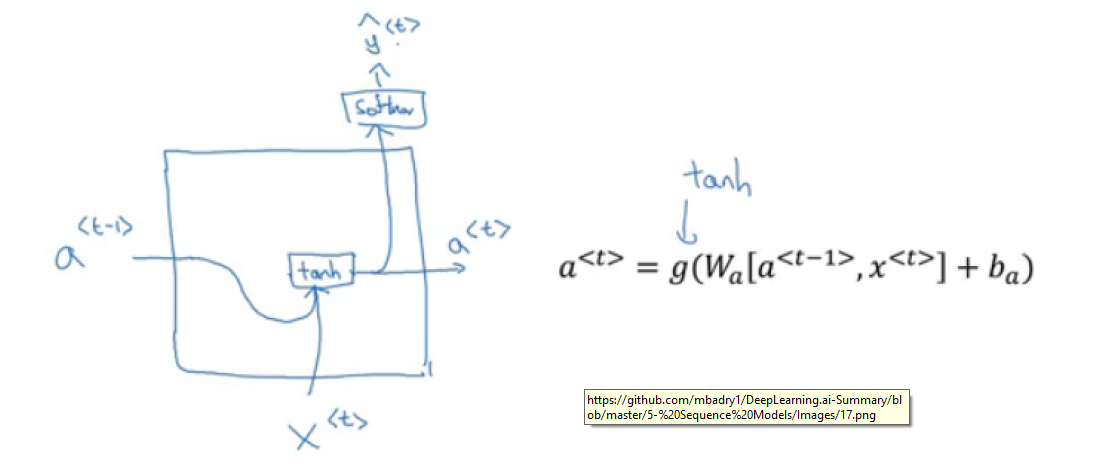

* In addition to the equation to update a(t), GRU introduced an update gate to regulate the proportion of a(t) and a(t-1) for each RNN unit (here we use c(t) and c(t-1) instead of a(t) and a(t-1)). 
  + c(t) is called memory cell, which will be passed to the next RNN unit to calculate c(t+1) and y(t)
  + update gate is an output of sigmoid function on the combined vector of c(t-1) and x(t), with its own update weights, Wu and bu. This gate is a value between 0 and 1, which defines the fraction of a(t) and a(t-1) (here in this equation is c (telda t, which is the updated cell) and c(t-1) respectively.
  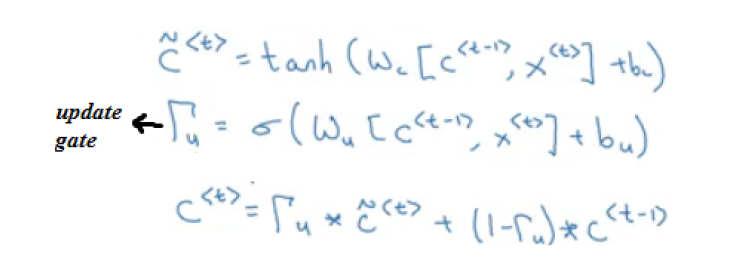
  + this update gate decides the composition of memory cell based on the updated cell and previous memory cell
  + in another word, the combined vector of c(t-1) and x(t) has two transformations:
    + tanh transformation generates updated cell
    + signma transformation generated update gate
* dimensions of a, c, updated cell, and u (update gate) are all vectors with a length of the number of hidden neurons  
* In full GRU, a new gate is used to calcuate the candidate C. The gate tells you how relevant is between c(t-1) and c(t)
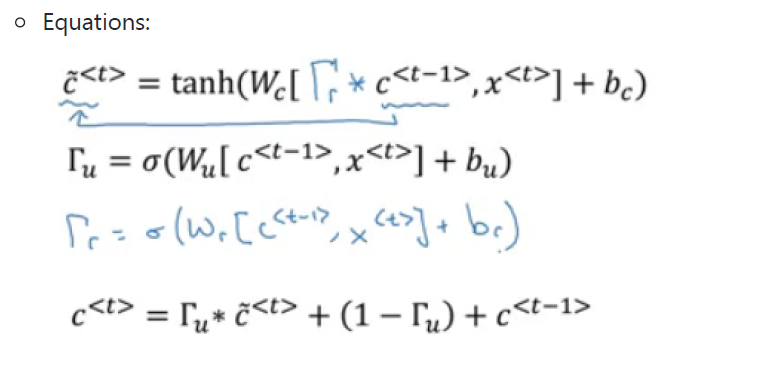

#### Long Short Term Memory (LSTM)
* the other type of RNN that can enable you to account for long-term dependencies. It's more powerful and general than GRU
* LSTM has an update gate U (sometimes it's called input gate I), a forget gate F, an output gate O, and a candidate cell variable C telda t
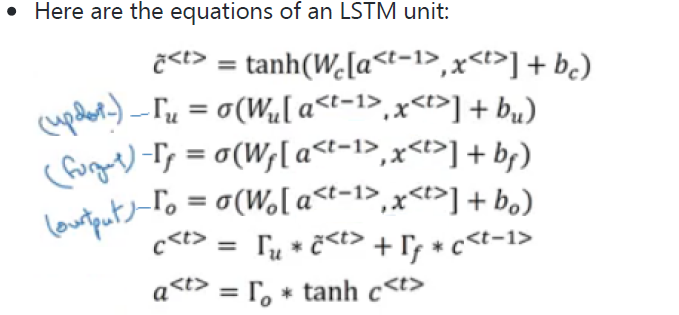
* The following picture describe how these vectors are related in LSTM:
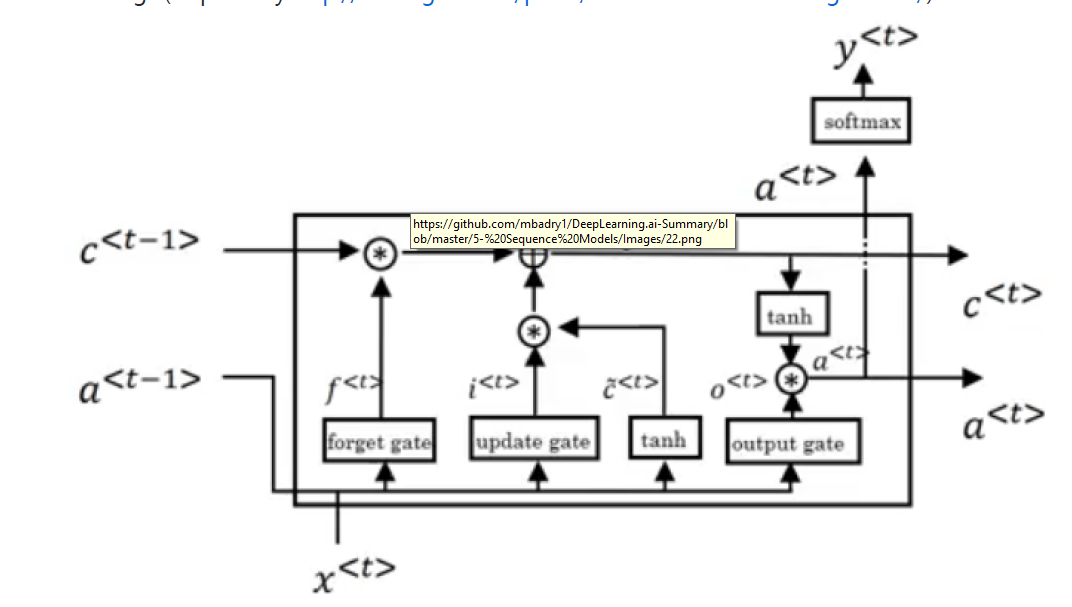

#### Bidirectional RNN
* the following graph shows the architecture of DRNNs:
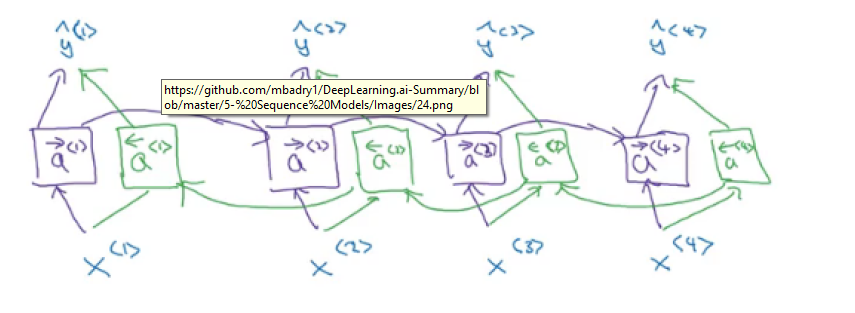
  + BiRNN is an acyclic graph
  + part of the forward propagation goes from left to right, and part from right to left. The model learns from both sides
  + to make predictions we use two activations that come from left and right to calculate y hat at t
  + The blocks can be any RNN block including the basic RNNs, LSTMs or GRUs
  + For a lot of NLP or text processing problems, a BiRNN with LSTM appears to be commonly used
  + the disadvantage of BiRNNs is that you need the entire sequence before you can process it. For example, in live speech recognition if you use BiRNNs you will need to wait for the person who speaks to stop to take the entire sequence and then make your predictions
  + BiRNN consists of two chains propogate in opposite directions. Each input goes to two nodes on the two chains, and both of these two nodes contribute to the output 
  
#### Deep RNNs
* In a lot of cases the standard one layer RNNs will solve your problem. But in some problems it is useful to stack some RNN layers to make a deeper network
* a deep RNN with 3 layers would look like this
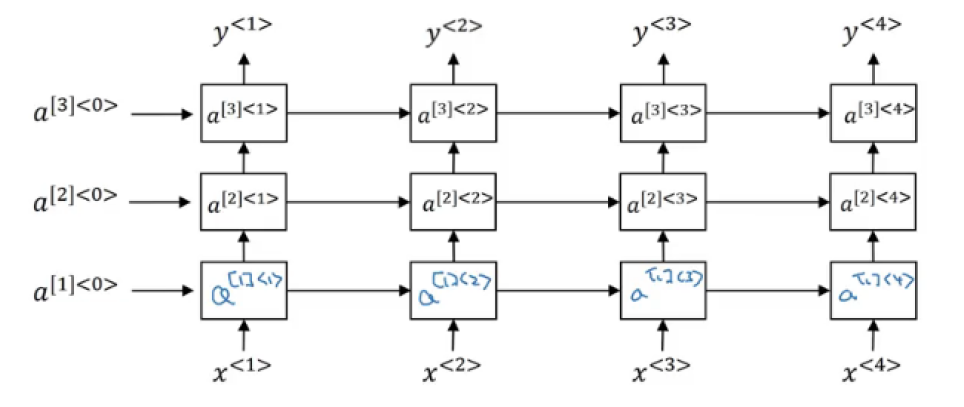
* in feed-forward deep nets, there could be 100 or even 200 layers. In deep RNNs stacking 3 layers is already considered deep and expensive to train
* in some cases, you might see some feed-forward netword layes connected after recurrent cell

#### Back propagation with RNNs
* in moden deep learning frameworks, you only have to implement the forward pass, and the framework takes care of the backward pass, so most deep learning engineers do not need to bother with the details of the backward pass. Refer to the notebook

### Natural Language Processing and Word Embeddings
* Natural language processing with deep learning is an important combination. Using word vector representations and embedding layers you can train recurrent neural networks with outstanding performances in a wide variety of industries. Examples of applications are sentiment analysis, named entity recognition and machine translation

#### Introduction to word embeddings
* NLP has been revolutionized by deep learning and especially by RNNs and deep RNNs
* word embeddings is a way of representing words. It lets your algorithm automatically understand the analogies between words like "king" and "queen"
* One way to represent our language is by a vocabulary. Then represent our words with a one hot vector that represents the word in the vocabulary
  + one of the weakness of this representation is that it treats a word a single entity and doesn't allow an algorithm to generalize across words. For example, a model would predict the word after orange juice, but for a sentence containing apple \_, it would not related the orange juice to apple juice, and predict that since orange juice is in the pattern, then the word afte apple might be juice
  + another drawback is that the inner product beteen any one-hot encoding vector is zero. In addition, the distance between them are the same
  
* To overcome these drawbacks of one-hot encoding, we would learn a featurized representation of words such that each word will have, for example, 300 features, each of which will be a float number.
    + each word column will be a 300-dimensional vector which will be the representation
    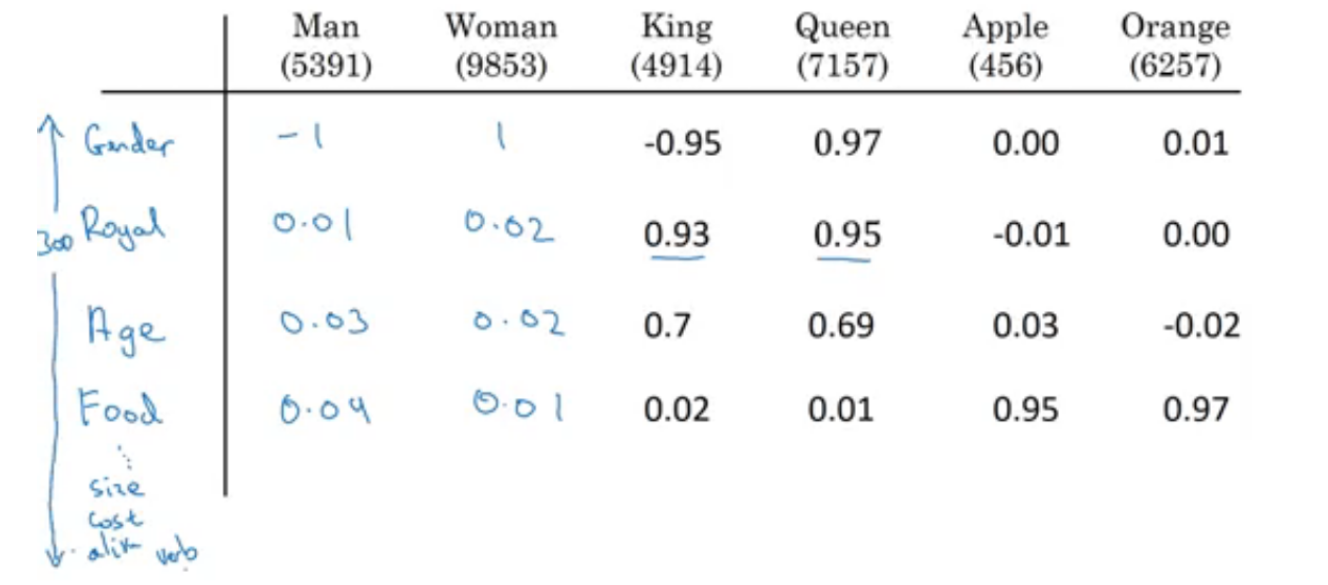
    + orange and apple now share a lot of similar features which makes it easier for an algorithm to generalize between them
    + we call this representation Word embeddings
* If we visualize the word embeddings by t-SNE algorithm to reduce the features to 2 dimensions, more related words are colser to each other
* word embedding allows us to embed a unique vector for each word inside a n-dimensional space

#### Using word embeddings
* word embedding allows RNNs to learn similar parttens even if the model hasn't seen some of the words in the sentence. For example
  + from the training data 'Sally Johnson is an organge farmer' with Sally Johnson being labelled as a name, the mode should be able to learn that Robert Lin in 'Robert Lin is an appler farmer' is a name.
  + The algorithm that are used to learn word embedding can examine billions of words of unlabeled text-for example, 100 billion words and learn the representation from them
* transfer learning and word embeddins:
  + learn word embeddings from large text corpus (1-100 billion of words)
    + or download pre-trained embedding online
  + transfer embedding to new task with the smaller training set (for example, 100k words)
  + optional: continue to fine tune the word embeddings with new data
    + if your smaller training set is big enough
* word embeddings tend to make the biggest difference when the task you are trying to carry out has a relatively smaller training set
* it reduces the size of the input from 10,000 dimension one-hot encoded vectors to 300 feature vectors
* in a word embedding task, we learn a representation for each word in our vocabulary
* Properties of word embeddings
  + they can help with analogy reasoning. 
    + eMan, eWoman, eKing and eQueen are embedding vectors corresponding to man, woman, king and queen. eMan - eWoman approximately equals to eKing - eQueen, so if we ask the question if man ==> woman, what is King ==>? the answer will be Queen
    + if we draw the 2D t-SNE of the four vectors on a 2D-plot, we will see the vector from man-> woman and king-> queen are parallel
  + Cosine similarity
    + we can calclate the cosine similarity between two vectors to evaluation their similarity
    + you can also use Euclidean distance as a similarity function. It measures a dissimilarity so take it with negative sign when evaluating the similarity
    + applying the concept, we can find the solution for analogy problem where u = eW, v = eKing - eMan + eWoman, and find the vector of queen for this problem using arg max sim(u, v) by cosine similarity. The algorithm should be able to extract eQueen for this problem

#### Embedding matrix
* suppose we are using 10,000 words as our vocabulary (plus token)
* the algorithm should create a matrix E of the shape (300, 10,000) in case we are extracting 300 features. Here each column corresponds to one word, and we have 10,000 words
* in our one-hot encoding, each word is expressed as a vector containing 10,000 elements. Only the index position corresponding to this word is one, and all other elements are zeros. Let's say one of the word is expressed as O6257. It is a 10,000 element column vector, with the element at index 6257 as 1 and all other elements are zeros
* E times O gives us a 300 times 1 vector. Using the column view matrix multiplication, we know only the element at row index 6257 generated the vector by mutiplying the 6257 the column in E and generate the column vector corresponding to the one-hot encoding of O6257. (each element in O6257 multiply a column from E and add them together, and only the 6257th column in E is multiplied by one and all othes are multiplied by zeros
  + in practice, it is not efficent to use a dot multiplication when extracting the embedding of a specific word, we use slicing to slice a specific column. In Keras there is an embedding layer that extracts this column with no multiplication
  
#### Learning word embeddings: Word2vec and Glove  
* Neural language model
  + using the input sentence and build a language model
    + get ej vectors for each word, and feed them into a NN network with a softmax layer to predict the probability of each word in the 10,000 words from the vocabulary and select the word with the highest probability
    + by selecting a appropriate context for each word (for example, the last 4 words before each word) and try to predict this word by optimizing the NN and softmax weights, and the corresponding word vectors, we traing the language model and the word vectors
    + we can use different context to train the language model
      + last 6 words. We can us a window of last 6 words (6 is a hyperparameter) and try to predict the next word from the 6 words before it
      + 4 words on the left and on the right
      + last 1 word
      + nearby one word
        + "glass" word is near "juice" in 'I want a glass of orange juice to go along with my cereal'
        + this is the idea of skip grams model
  + if you want to build a language model, it is natural to use the last few words as the context. If your main goal is to learn a word embedding, you can use all of the other contexts, which will result in very meaningful work embeddings.
  + To summarize, the language modeling problem poses a machine learning problem where you input the cntext (such as the last 4 words) and predict some target words. Posing that problem allows you to learn good word embeddings
* Word2Vec
  + skip-grams
    + we choose a context randomly from a sentence and then randomly select a target from the sentence. For example, in the sentence 'I want a glass of orange juice to go along with my cereal'. we choose 'orange' as the context and choose target around this context randomly based on a window with a specified size. If the window size we choose is -10 to +10, then all the words before and after the context word within 10 word distance will be randomly selected
    + by doing this, we convert the problem into a supervised problem. Now we have a context word as the input and the target word as the prediction target variable
    + we learn this problem to get word embedding vector for context word c, which is ec by a softmax layer to get p(t|c) which is y hat. We also use cross-entropy loss function. This model is called skip-grams model. The softmax probability is expressed as below:
    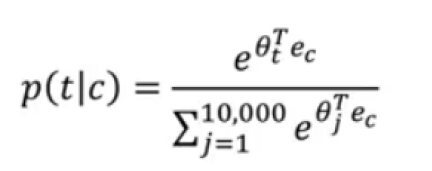
    + all the theta parameters are softmax parameters, and ec is the word vector corresponding to context word. Here we summing 10,000 numbers corresponding to the number of words in our vocabulary
    + in practice, we use some heuristics to balance the common words and the non-common words when selecting context word randomly from the corpus
    + word2vec paper includes 2 ideas of learning word embeddings. One is skip-gram model and antoher is CBoW (continuous bag-of-words)
  + negative sampling
    + similar to skip-gram model, but with a much more efficient learning algorithm by creating a different learning problem
    + for example, from the sentence "I want a glass of organe juice to go along with my cereal", we select 'orange' as the context word, and select 'juice' as the target word using a fixed window as in skip-gram technique. Then we randomly select k words from the entire vocabulary as negative example, even if some of these k words are within the our window.
    + k is recommended to be from 5- 20 in small datasets. For larger ones, 2 t 5
    + we will have a ratio of k negative examples to 1 positive ones in the data we are collecting
    + how to define the model that will learn this supervised learning problem?
      + we use a simple logistic regression model: 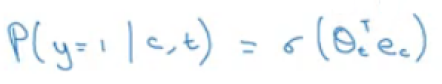
      + the logistic regression model model can be drawn like the following:
      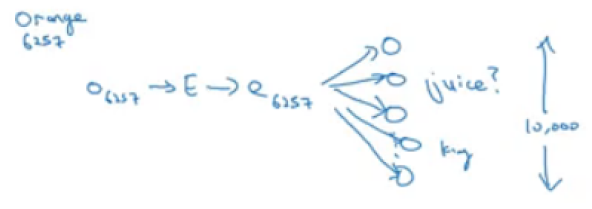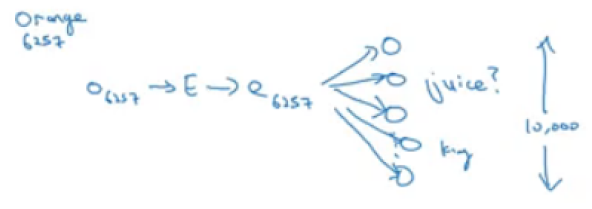
      This figure shows that we have 10,000 binary classification problems, and we only train k+1 classifiers of them in each iteration
      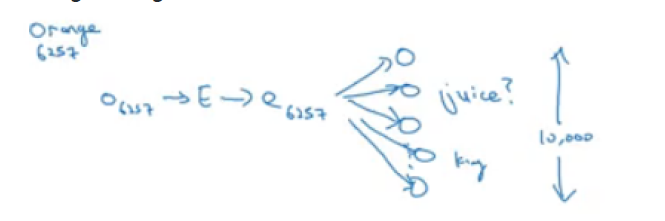
    + how to select negative samples
      + sample with the following equation where wi is the frequency of the word i in the corpus
      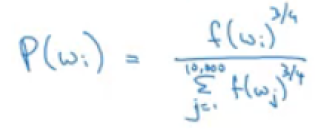
      
* GloVe word vectors (global vectors for word representation)
  + we use the same process to sample a context and target from the previous process
  + then calculate this for every pair: Xct = number of times t appears in context of c
  + Xct = Xtc if we choose a window pair, but they will not equal if we choose the previous words for example. In Glove a window was used.
  + in the following picture, theta and e vectors are symmetric. Therefore, we can get eC as average of the eC and theta C 
  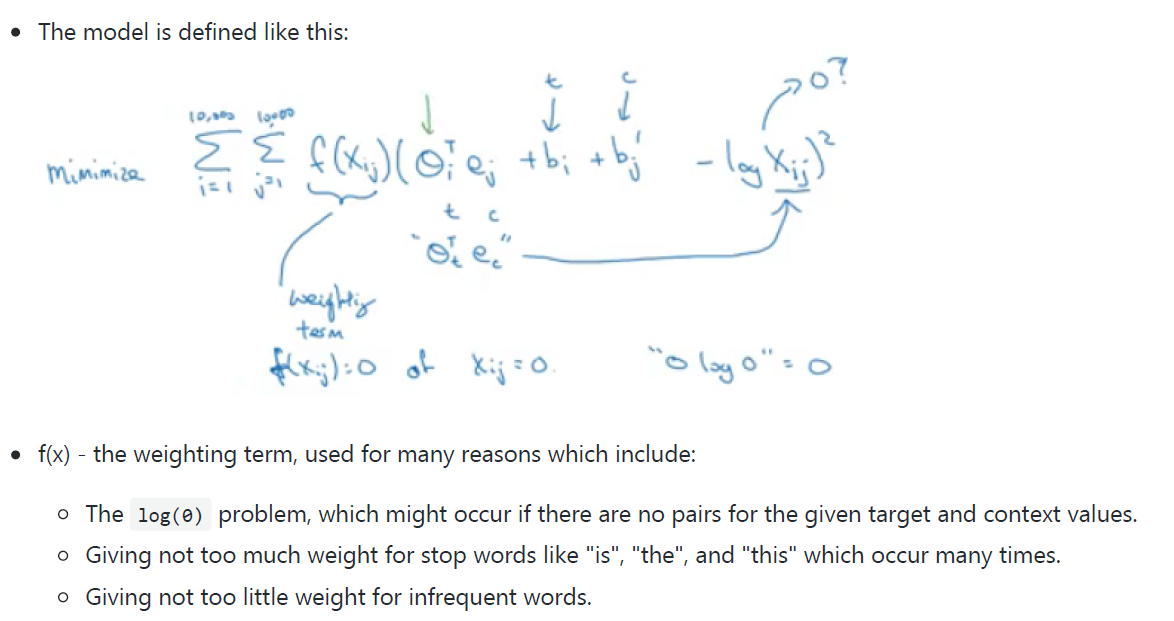
        

#### Applications of word embeddings
* Sentiment classification
  + the process of finding if a text has a positive or a negative review
  + the challenge is that you might not have a huge labeled training data for it. Using word embeddings can help getting rid of this
  + the common dataset sizes varies from 10,000 to 100,000 words
* sentiment classification model
  + use the sum or average of all the words in the comments to generate one vector representing the entire review sentence, and then train a softmax model to predict the rates, for example, from 1-5
    + problem is that it ignores the word order. For example, 'completely lacking in good taste, good service, and good ambience' has the word 'good' three times, but is a negative review.
  + a better model uses an RNN for solving this problem, as shown below
  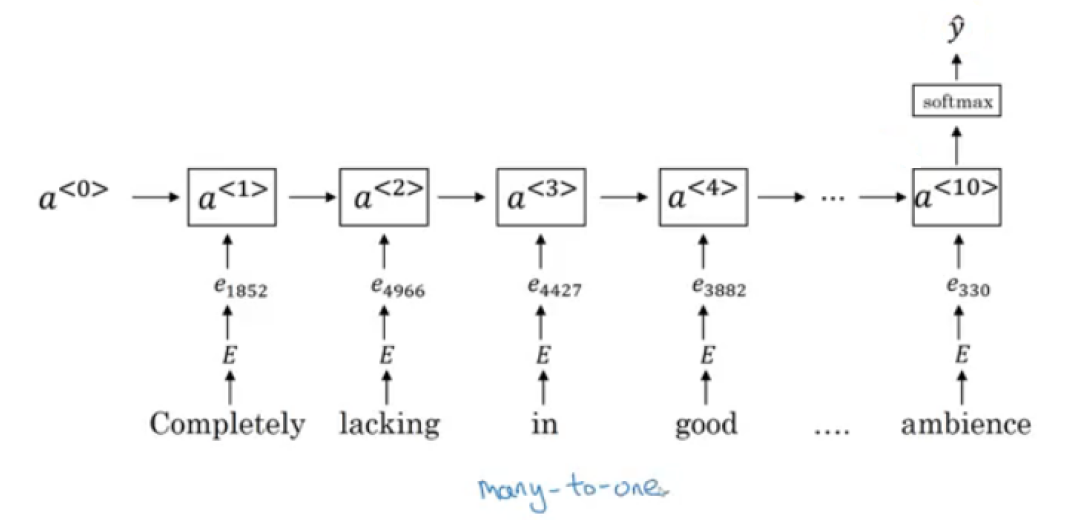
    + this model can generate a decent sentiment classification algorithm
    + it will generalize better even if words weren't in your dataset.
      + if some of the words in reviews are not in your label training set,if they are in your 1 billion or 100 billion word corpus used to train the word embeddings, it might still get this right and generalize much better.
      
* eliminating bias in word embeddings
  + neutralize
    + first step is to find many word vectors that contain the biased difference, and find its direction. For example, to eliminate gender biase, we find a set of words referring to gender, and find the difference between each pair of the vecotr, which is direction of the gender difference, we then average them. The below is an example:
      + we find the direction of e, he - e, she; e, male - e, female, e, girl - e, boy etc, and average them. The averaged difference represents the gender difference. In real word, we can use SVD to defint the vector direction of the pricinple component vectors representing the difference
      + for other words that should not have the gender difference, such as doctor and nurse, computer programmer and homemaker etc, we project these word vectors to get rid of the bias by project on the components excluding the vector representing the gender difference (or on direction orthogonal to it)
  + equalize pairs
    + for pairs that demonstrate the bias, for example, grandmother and grabdfather have difference distances from babysitter that have already been projected by neutralization step, this means the grandmother and granfather have bias in terms of babysitter. Since after the projection, the word babysitter is already on a direction that is orthogonal to gender difference direction, we will adjust grandmother and grandfarther along the gender direction to make them have equal distance from the origin along the gender direction.
  + equalize pairs
    + there are small number of word pairs that need to be equalized
    

### Sequence models and Attention mechanism
* sequence models can be augmented using an attention mechanism. This will help your model understand where it should focus its attention given a sequence of inputs. 

#### Various sequence to sequence architecture
* Basic models
  + many to many models in various applications including machine translation and speech recognition
  + start with the basic model of machine translation in which X (input) is a French sequence and Y (output) is an English sequence, as shown below
  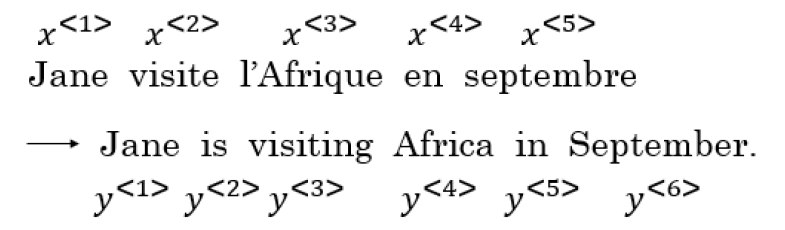
  + Our architecture include encoder and decoder
  + The encoder is RNN with LSTM or GRU included that takes the input sequence and then outputs a vector that should represent the whole input
  + Decoder network, which is also an RNN takes the vector generated by encoder and outputs the new sequence. The architecture is shown below
  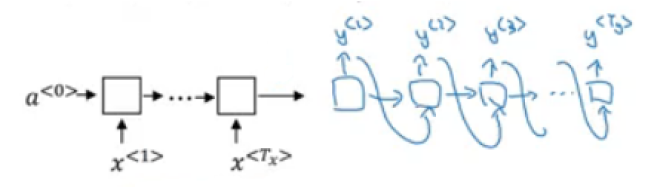
  + the similar architecture works for image captioning problem to convert images to texts, as shown below
    + the architecture uses a pretrained CNN (like AlexNet) as an encoder for the image, and the decoder is an RNN
    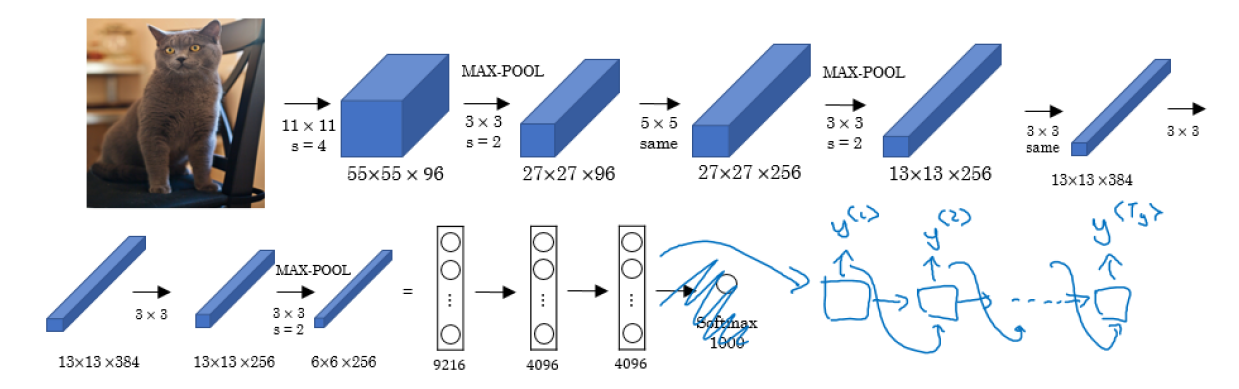
    
* Picking the most likely sentence
  + there are some similarity between the language model and the machine translation model based on encoder-decoder, but there are some differences
    + the language model is very similar to the decoder part of the machine translation model
    + problems formulations are different
      + in language model: P(y(1), y(2),... y(t)). 
        + We find the probability of a sentence
        + usually, the word generated from one unit is used as the input of the next unit
        + the input of the language model is a vector with all elements initialized as zeros 
      + in machine translation: P(y(1), y(2),...y(t) | x(1), x(2), ...x(t))
        + the vector generated by the encoder is used as the input to the decoder, and therefore, all the inputs of x(1),...x(t) are used as the condition for output predictions, making it a conditional language model 
        + the task of the translation is to get the sentence with the max probability, rather than randomly generate each word of the translation. This is important to keep a consistent translation result
  + for translation, we will choose the sentence that gives us the max joint probability of each word, rather than using greedy algorithm where we choose each word sequentially with the max probability for that word.  
  + due to the huge amount of the possible combinations of words, (for a sentence of 10 words with a vocabulary of 10,000 words, there are 10,000 ^ 10 combinations of words), we use a search algorithm to approximately find the sentence corresponding to the max joint probability
  
* Beam search
  + most widely used algorithm to get the best output sequence. It is a heuristic search algorithm
  + the algorithm has a parameter B which is the beam width. If we take B = 3, the algorithm will get 3 outputs at a time, instead of just select only one best choice
  + for example, for the translation, the Beam search may choose 'in', 'jane' and 'september' three candidate words for the first word of the translation
  + then the next step, we have three copies of the RNN network, each train using one of the three words as the first input to the network, and find the most possible word for the next word by softmax.
    + Now, for each of the 3 RNN network, we have 10,000 probabilities for each word in vocabulary, and among these 30,000 branches, we select 3 word sequences with the highest probability for the next step. For example, if the three top choices are "in september", "jane is" and "jane visit", we will go with these three sequences. Note that we will delete the first word of september and all its branches.
    + repeat the process and each time, we only keep the top 3 best sequences. If B = 1, this will become the greedy search

* Refinements to Beam Search
  + Length optimization
    + since the searhc algorithm is based on the multiplication of many conditional probabilities, as shown below, this will cause a numerical overflow:
    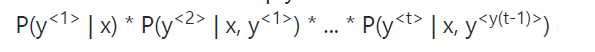
    + to overcome this, we will use summing logs of probabilities, instead of multiplying them directly
    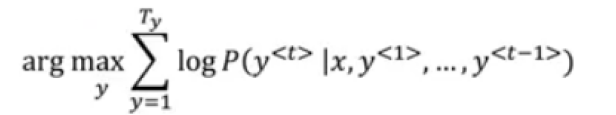
    + However, there is another problem: since we are multiply small fraction numbers, the long a sentence is , the smaller the product value of the probabilities, and shorter sentences will naturally have bigger probability values.
      + to overcome this, we divide the sum of log value by the number of words in the sequence, to cancel the length effects. In addition, we use a hyperparameter, alpha to tune how much we want to use the length normalization, as show below:
      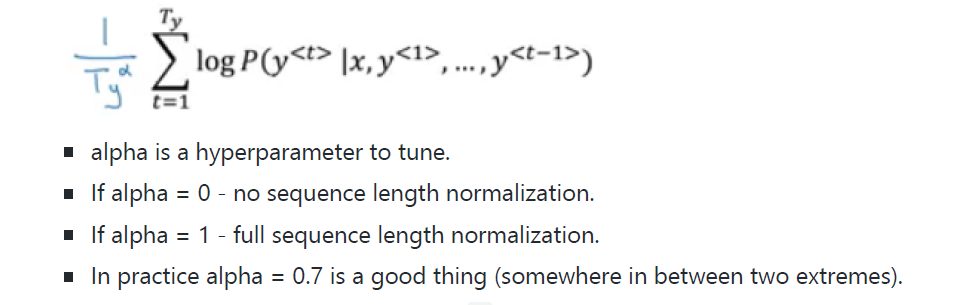
  + how can we choose best B?
    + the larger B, the larger possibilities, the better are the results, but it will be more computationally expensive.
    + in practice, you might see in the production setting B = 10
    + B = 100, B = 1000 are uncommon, sometimes used in research settings
    + Beam search runs faster but is not guaranteed to find the exact solution
* Error analysis in beam search
  + we will use error analysis to figure out if the B hyperparameter of the beam search is the problem, or in our RNN part, if it dosen't get an optimal solution.
  + example
    + initial information
      + x = "Jane viste I'Afrique en septembre" (French)
      + y* = "Jane visits Africa in September." - optimal answer
      + y^ = "Jane visited Africa last September." - answer produced by model
    + our model has produced a not optimal result
    + We now want to know who to blame - the RNN or the beam search
    + to do that, we calculate P(y* | X) and P(y^ | X). There are two cases:
      + case 1: P(y* | X) > P(y^ | X):
        + conclusion: Beam search is at fault
      + case 2: P(y* | X) <= P(y^ | X):
        + conclusion: RNN model is at fault
    + The error analysis process is as following:
      + You choose N error examples and make the following table:
      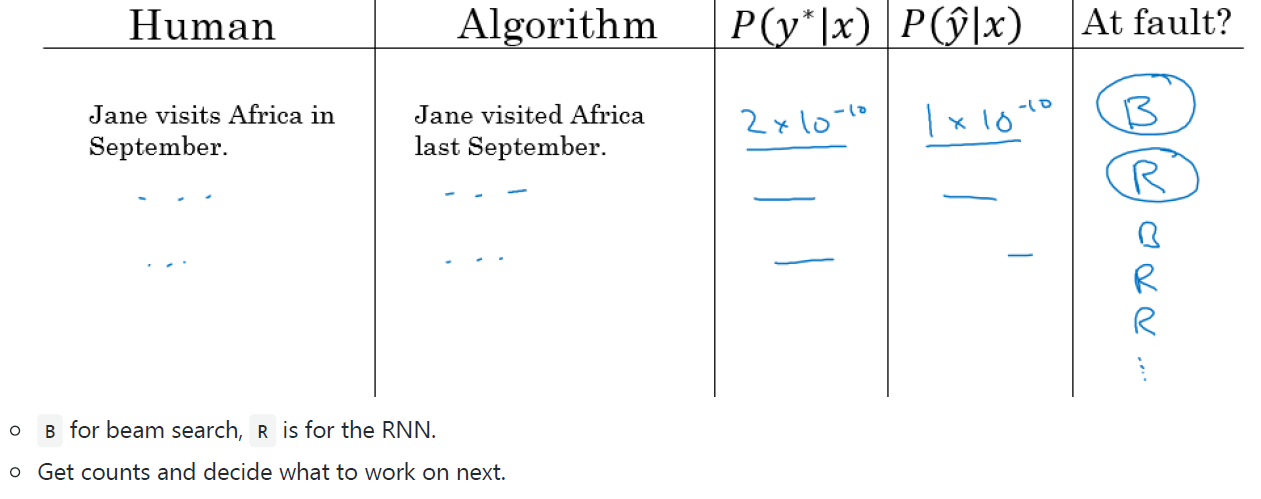
  + BLEU Score
    + One of the challenges of machine translation, is that given a sentence in a language there are one or more possible good translation in another language. So how do we evaluate our results?
    + we do this by BLEU score, which stands for bilingual evalutaion under study
    + The intuition is: as long as the machine generated translation is pretty close to any of the references provided by humans, then it will get a high BLEU score.
    + Let's take an example:
      + X = "Le chat est sur le tapis."
      + Y1 = "The cat is on the mat." (human reference 1)
      + Y2 = "THere is a cat on the mat." (human reference 2)
      + suppose that the machine outputs: "the the the the the the the."
      + One way to evaluate the machine outputis to look at each word in the output and check if it is in the refernces. This is called precision
        + precision = 7/7 because "the" appeared in Y1 or Y2, which is not a useful measure
        + we can use a modified precision in which we are looking for the reference with the maximum number of a particular word and set the maximum appearing of this word to this number. So:
          + modified precision = 2/7 because the max is 2 in Y1
          + in this modified precision, we clipped 7 times by the max, which is 2
        + instead of looking at one word at a time (unigrams), we can look at n-grams, too
      + BLEU score on bigrams
        + the n-grams typically are collected from a text or speech corpus. When the items are words, n-grams may also be called shingles. An n-gram of size 1 is referred to as a "unigram", size 2 is a "bigram", size 3 is "trigram". Note that we will count the frequencies of bi-gram in translation to the combined bi-gram occurances in both reference 1 and referrence 2.
        + X = "Le chat est sur le tapis."
        + Y1 = "The cat is on the mat."
        + Y2 = "There is a cat on the mat."
        + Suppose that the machine outputs: "the cat the cat on the mat."
        + The bigrams in the machine output:
        Pairs   Count Count clip
        the cat   2     1 (Y1)
        cat the   1     0
        cat on    1     1 (Y2)
        on the    1     1 (Y1)
        the mat   1     1 (Y1)
        Totals    6     4
        Modified precision = = sum(Count clip) / sum(Count) = 4/6
        
        + the equation is the following:
        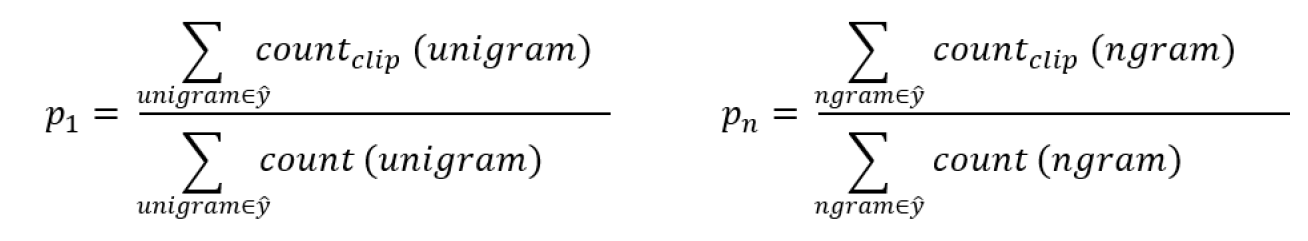
        
      + Formalize the BLEU score:
        + calculate P(n) = Bleu score on one type of n-gram
        + combined BLEU score = BP * exp(1/n * sum(P(n) ))  
          + if we want BLEU for 4, we calculate P(1), P(2), P(3) and P(4), average them and take the exp
          + BP is called BP penalty which stands for brevity penalty. It turns out that if a machine outputs a small number of words it will get a better score so we need to handle that.
          + 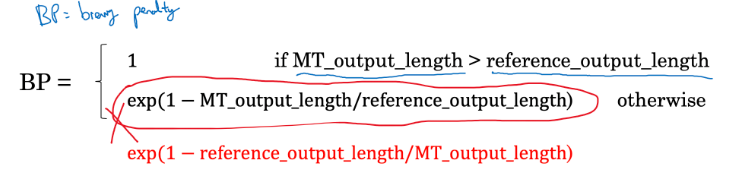
        + BLEU score has several open source implementations
        + It is used in a variety of systems like machine translation and image captioning
        
#### Attention Model Intuition
* Attention is a technique used in sequence to sequence models with an encoder and decoder to make these models better
* The problem of long sequences
  + encoder needs to memorize a long sequence into one vector, and the decoder has to process this vector to generate the translation
  + If a human would translate this sentence, he/she wouldn't read the whole sentence and memorize it then try to translate it. He/She translates a part at a time
  + The performance of this model decreases if a sentence is long
  + attention model works like a human that looks at parts of input sequence at a time. This will significantly increase the accuracy even with longer sequence
  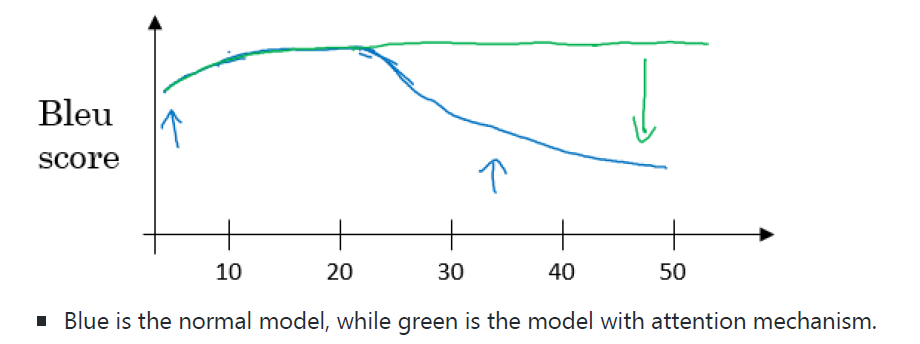
* Intuition about attention models
  + in a typical machine translation model consisting of a encoder and decoder, the encoder is a bidirectional RNN that convert the input sentence to a vector for decoder
  + Encoder consists of a bidirectional RNN to encode the input language (eg. French), and a unidirectional RNN to produce the output vector using a context c which is computed using the attention weights that denotes how much information the output needs to look in a(t').
  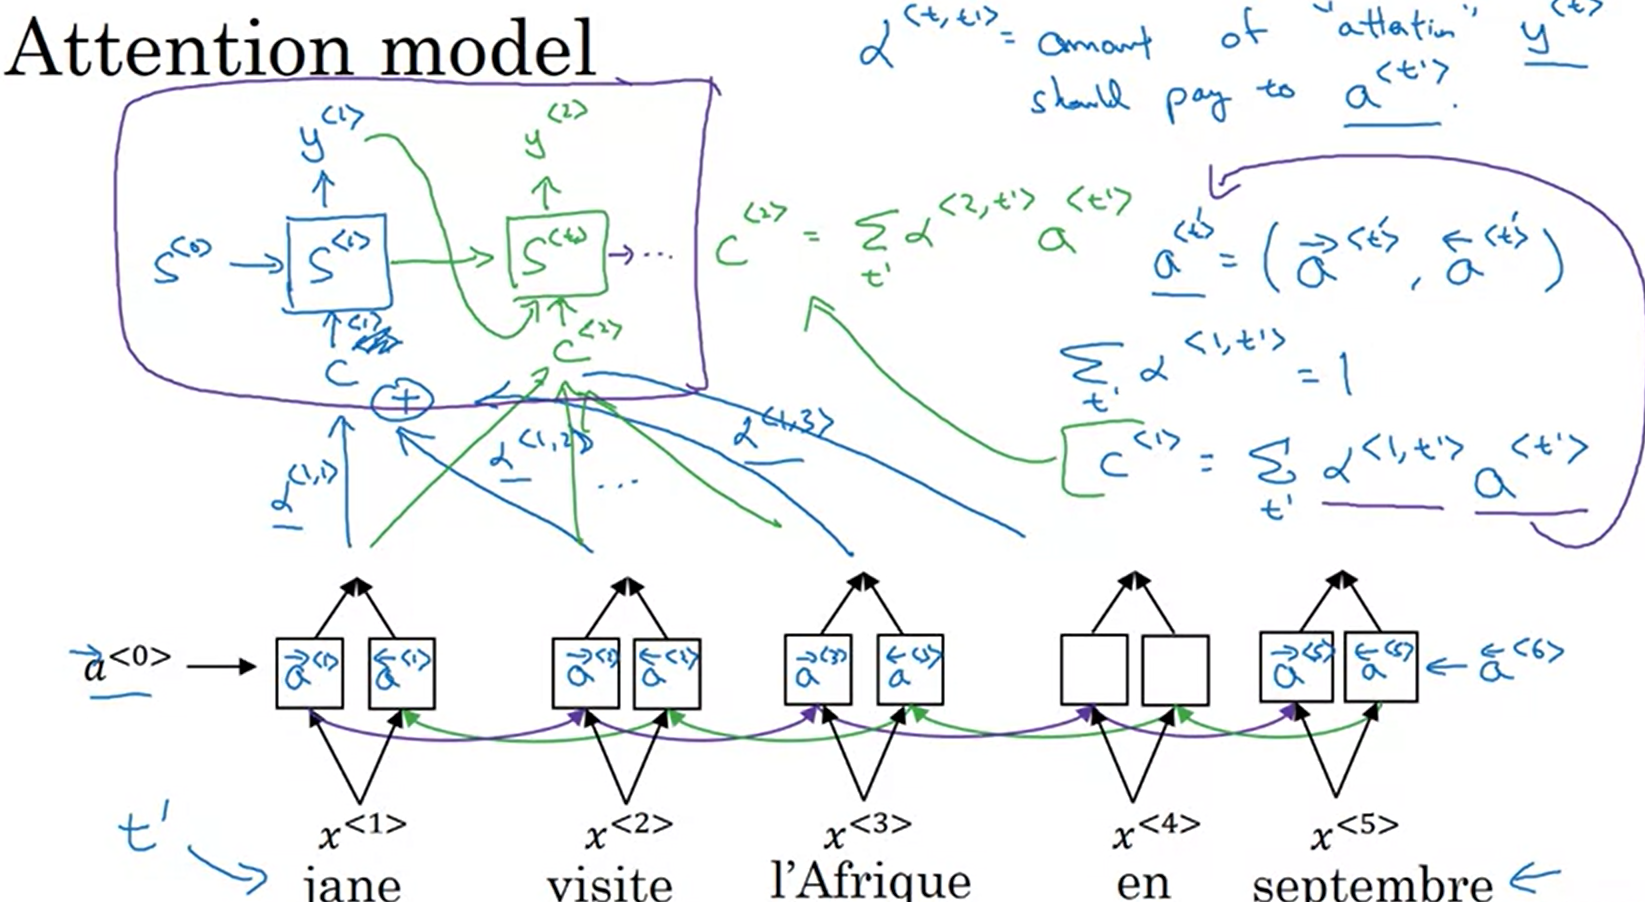
    + Here, a(t') denotes the concatenated vetor of directions activations at time step t' from the bidirectional RNN in both directions
    + context c(i) defines that the input for the ith unit of the unidirectional RNN with the definition as shown below:
    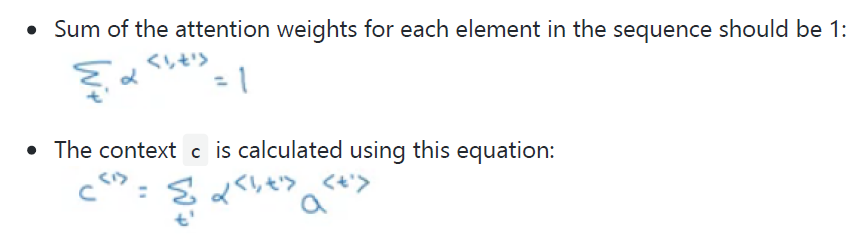
      + for a specific unit i of the unidirectional RNN, sum of alpha(i, t') = 1, where t' is the unit of the bidirectional RNN from 1 to the end of the RNN. The alpha values defines how much weight (attention) the context unit should pay to each unit of the bidirectional RNN
    + Values of alpha(t, t') is calculated by a softmax function using e(t, t') as shown below
    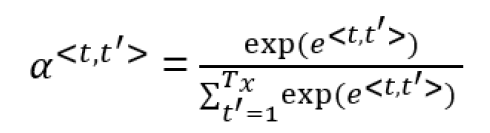
    + values of e(t, t') is calculated using a single layer neural network from a(t'), which is the acitivation of bidirectional RNN at unit t', and s(t-1), which is the hidden state of the unidirectional RNNs at the previous time stamp. as shown below:
      + the intuition is that the attention you should pay at time stamp t of the unidirectional RNNs to any unit provided by the bidirectional RNNs (let's say at time stamp t') should depends on the hidden unit of the unidirectional RNNs at time stamp t-1 which is s(t-1), and the activation provided by the bidirectional RNNs at time stamp t', which is a(t'). In addition, the attention you should pay at time stamp t, to each of the activations provided by the bidirectional RNNs should sum up to 1. However, we don't know exactly how s(t-1) and a(t') will impact the attention, so we use a simple neuron network to learn e(t, t') and then use softmax to generate the set of alpha(t, t') so that all alpha(t, t') sum up to 1. Here t and t' refers to the time stamp of the unidirectional and bidirectional RNNs, respectively.
    
     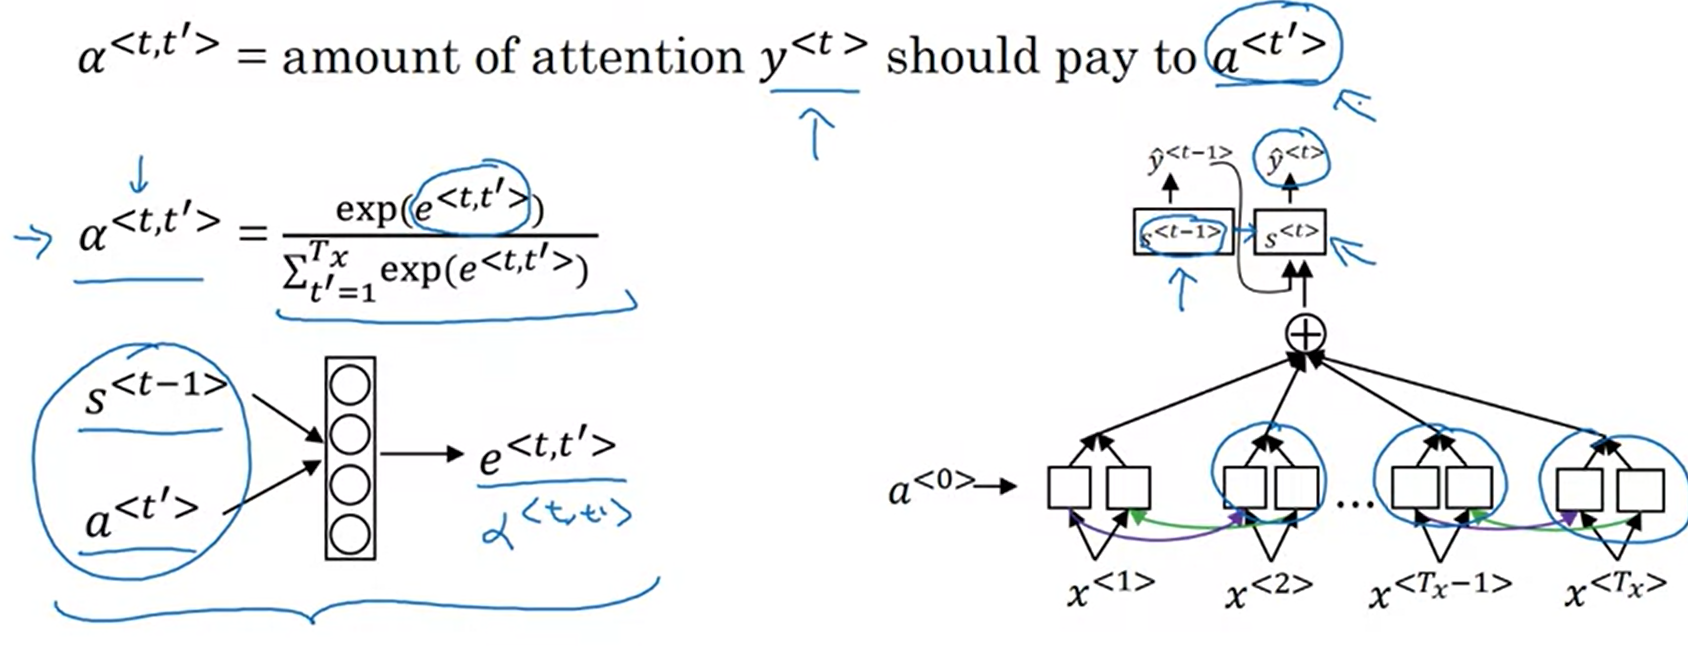
     
    + one disadvantage is that this algorithm takes quadratic time or quadratic cost to run
    
 * An example of the translation attention model is attached:
 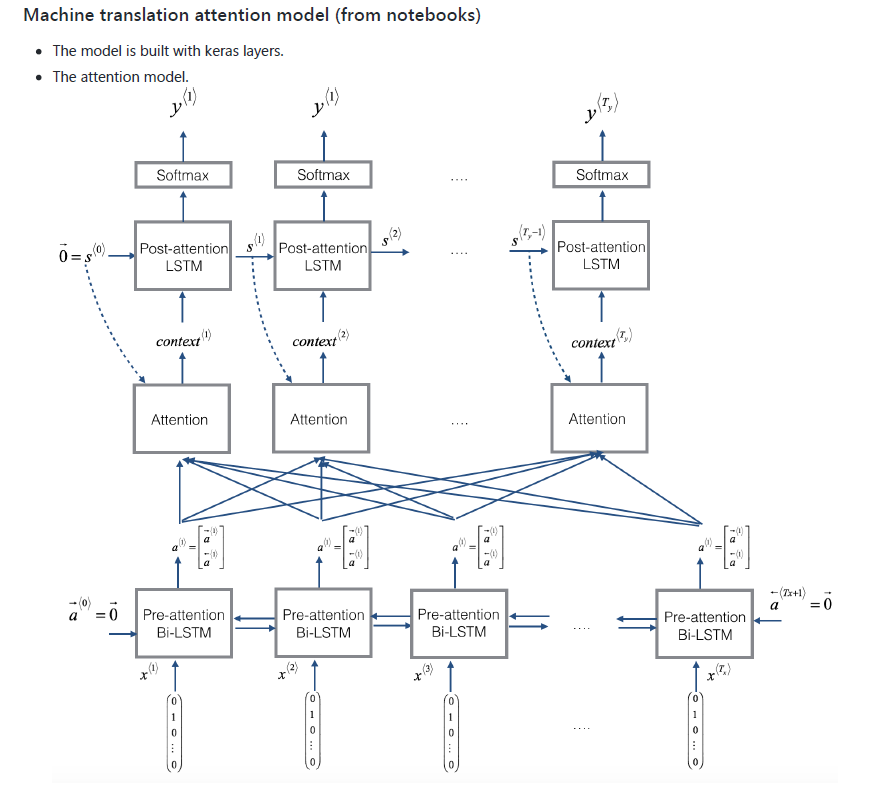
 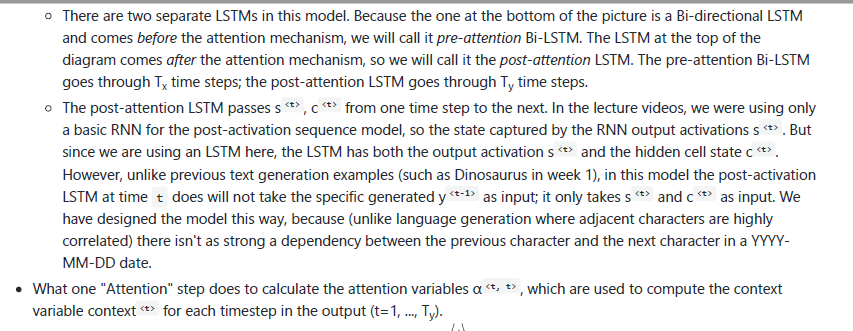
 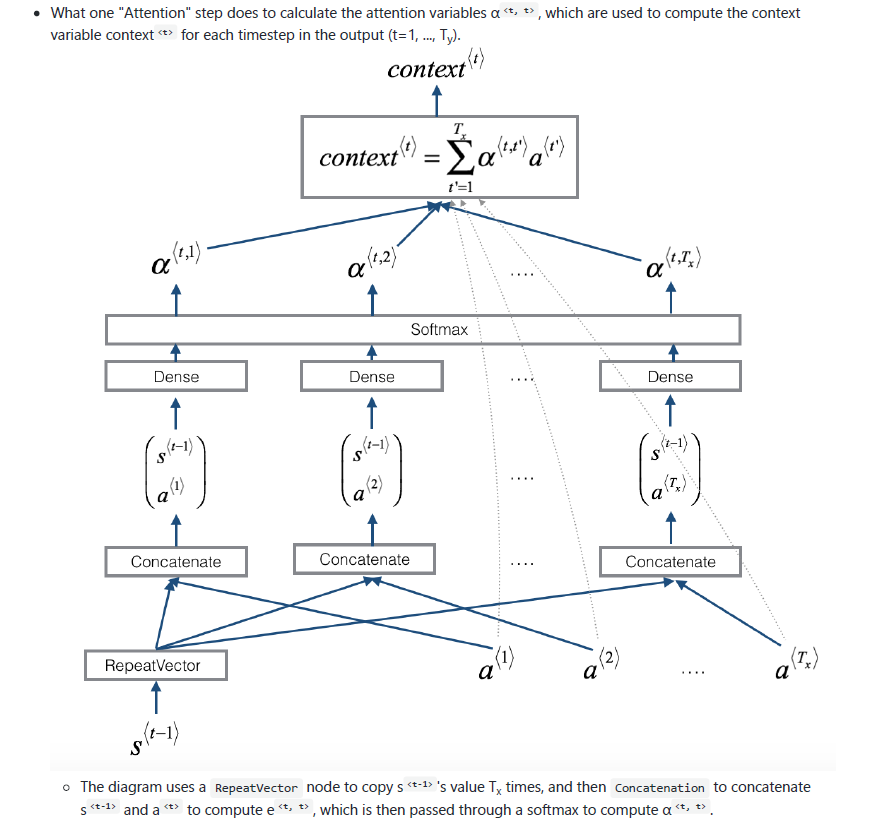
    

### Speech recoginition
* input (X) and output (Y) are audio clip and transcript, respectively
* autoclip is a 2-d data where x-axis and y axix are the time and air pressure, respectively
  + if audio is sampled at 44100 Hz, then a 10 s clip will have 441, 000 points
  + the raw audio data need to be converted to spectrograms, which is a 3-d dataset with x, y, and z correspond to time, frequency and intensity, respectively. 
    + you can image at each time point, there are mutiple frequency components represented by y axis, and each of intensity of each components are expressed by colors
    + A spectrogram is computed by sliding a window over the raw audio signal, and calculates the most active frequencies in each window using Fourier transformation
    + phonemes are not needed for speech recognition due to the deep learning based on large audio datasets. The best commercial systems are trained on over 100,000 hours of audio
* you can build an accurate speech recognition sysem using the attention model, as shown below
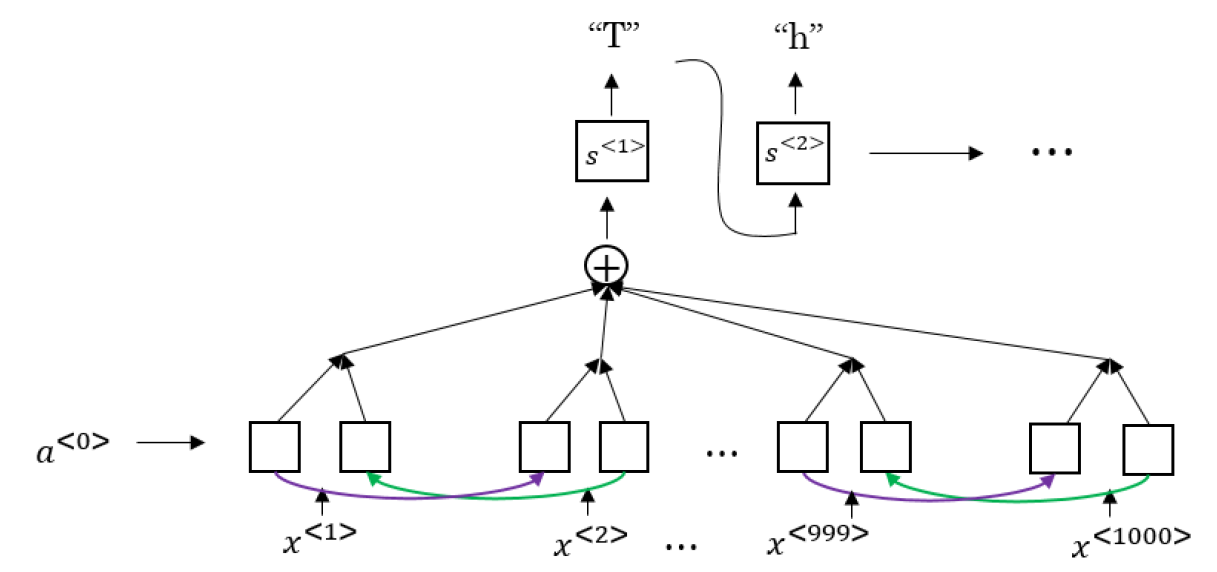
* One of the methods that seem to work well is CTC cost, which stands for "Connectionist temporal classification"
  + realizing that the input of the auido is much longer than output text. A 10s audio clip collected at 100 HZ will contain 1000 points but the text will contain much less than 1000 chars
  + CTC cost function allows the RNN to output something like this:
    + ttt_h_eee<SPC>\_\_\_\<SPC\>qqq\_\_\_ - this covers "the q".
    + the \_ is a special character called "blank" and \<SPC\> is for space
    + basic rule for CTC: collapse repeated characters not separated by "blank"
    + this allows us to represent text with the number of chars much shorter than the input audio signals 
  + using both attention model and CTC cost can help you to build an accurate speech recognition system.  

#### Trigger word detection
* With the rise of deep learning speech recognition, there are a lot of devices that can be waked up by saying some words with your voice. These systems are called trigger word detection systems.
* Trigger word detection system include
  + Amazon Echo (Alexa)
  + Baidu DuerOS (xiaodunihao)
  + Apple Siri (Hey Siri)
  + Google Home (Okay Google)
* A model than can solve this problem
  + X: audio clip
  + X has been preprocessed and spectrogram features have been return as
    + X(1), X(2), ..., X(t)
  + Y will be labels 0 or 1. 0 represents the non-trigger word, while 1 represents the trigger word
  + The model architeture can be like this
  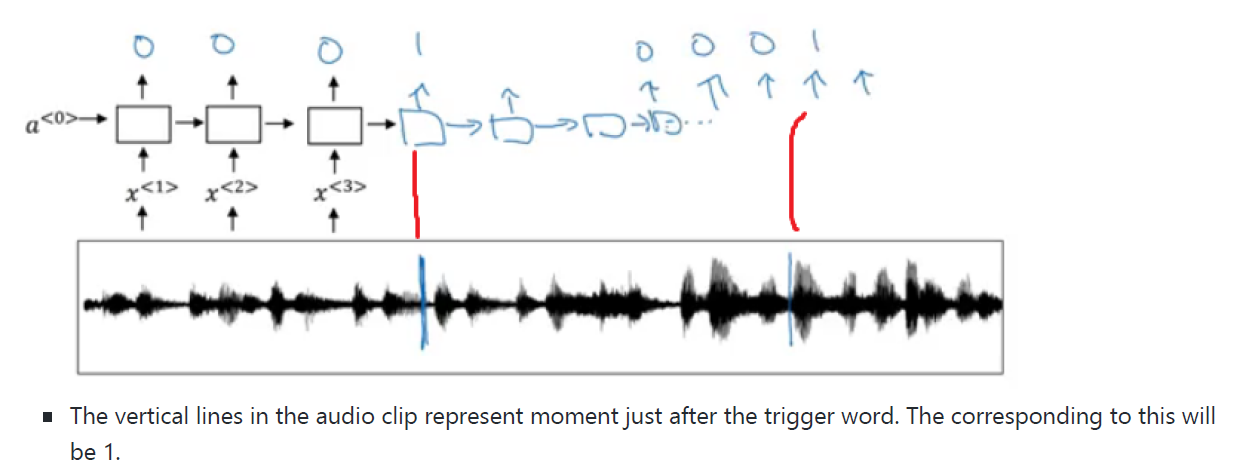
  + one disadvantage is that the training set is very imbalanced. There will be a lot of zeros and few ones
  + A hack to solve this is to make an output a few ones for several times or for a fixed period of time before reverting back to zero.
  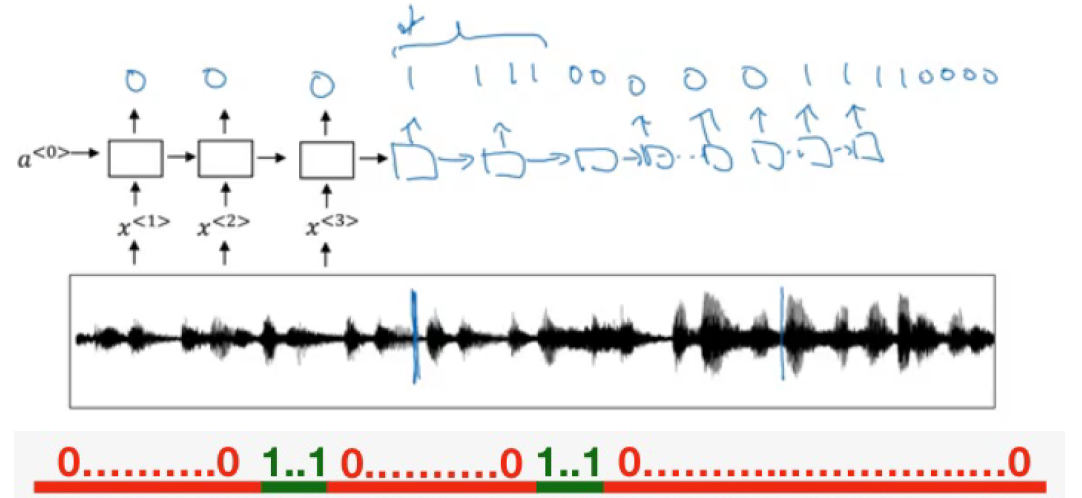
  